# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [1]:
# use these links to do so:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 

In [2]:
data = pd.read_csv("Churn.csv")

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Understanding the data

In [5]:
data.size

147903

In [6]:
data.shape

(7043, 21)

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# checking the labels frequency

Text(0, 0.5, 'frequency')

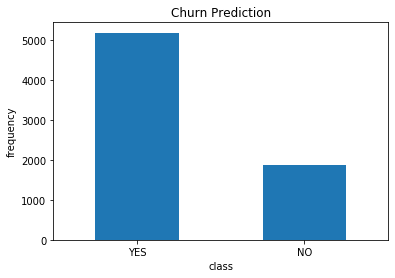

In [8]:
label = ["YES","NO"]
count_classes = pd.value_counts(data['Churn'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.title("Churn Prediction")
plt.xticks(range(2), labels=label)
plt.xlabel("class")
plt.ylabel("frequency")

In [9]:
columns = data.columns
columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
print(data.corr)

<bound method DataFrame.corr of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  \
0              No  No phone service             DSL      

### Data Manipulation

In [11]:
Lb = LabelEncoder()

In [12]:
data['customerID'] = Lb.fit_transform(data['customerID'])
data['gender'] = Lb.fit_transform(data['gender'])
data['Partner'] = Lb.fit_transform(data['Partner'])
data['Dependents'] = Lb.fit_transform(data['Dependents'])
data['PhoneService'] = Lb.fit_transform(data['PhoneService'])
data['MultipleLines'] = Lb.fit_transform(data['MultipleLines'])
data['InternetService'] = Lb.fit_transform(data['InternetService'])
data['OnlineSecurity'] = Lb.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = Lb.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = Lb.fit_transform(data['DeviceProtection'])
data['TechSupport'] = Lb.fit_transform(data['TechSupport'])
data['StreamingTV'] = Lb.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = Lb.fit_transform(data['StreamingMovies'])
data['Contract'] = Lb.fit_transform(data['Contract'])
data['PaperlessBilling'] = Lb.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = Lb.fit_transform(data['PaymentMethod']) 
data['TotalCharges'] = Lb.fit_transform(data['TotalCharges']) 
data['Churn'] = Lb.fit_transform(data['Churn'])

In [13]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [14]:
data.shape

(7043, 21)

In [15]:
corr = data.corr()

In [16]:
X = data.drop('Churn',axis=1)     # distributing the data into features and labels.....
y = data['Churn']

In [17]:
col_to_norm = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',             
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
data[col_to_norm] = data[col_to_norm].apply(lambda x : (x - x.min())/(x.max()-x.min()))
  #Min-Max Normalization: This technique re-scales a feature or observation value with distribution value between 0 and 1

In [18]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.763277,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.383614,0
1,0.562624,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.224502,0
2,0.364101,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229,0.024043,1
3,0.785998,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303,0.214395,0
4,0.924595,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891,0.141654,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.689151,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189,0.244564,0
7039,0.216558,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274,0.872588,0
7040,0.478131,0.0,0.0,1.0,1.0,0.152778,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935,0.458499,0
7041,0.842658,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706,0.407351,1


### Data Visualization

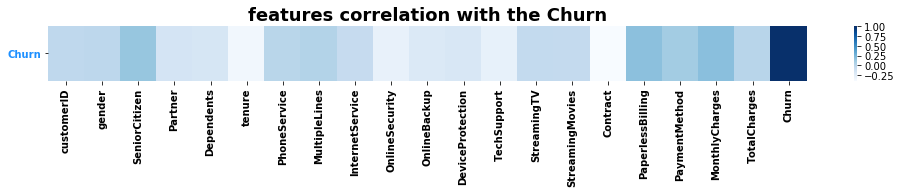

In [19]:
f,ax=plt.subplots(figsize=(17,1))                        
sns.heatmap(corr.sort_values(by=['Churn'],ascending=False).head(1), cmap='Blues')
plt.title("features correlation with the Churn", weight='bold', fontsize=18)
plt.xticks(weight='bold')
plt.yticks(weight='bold', color='dodgerblue', rotation=0)
plt.show()

In [20]:
realtion = corr['Churn'].head(31).to_frame()     #here also same we are checking the relation but is in table form
cm = sns.light_palette("red", as_cmap=True)
realtion.style.background_gradient(cmap=cm)

,Churn
customerID,-0.0174472
gender,-0.0086121
SeniorCitizen,0.150889
Partner,-0.150448
Dependents,-0.164221
tenure,-0.352229
PhoneService,0.011942
MultipleLines,0.0380369
InternetService,-0.0472914
OnlineSecurity,-0.289309


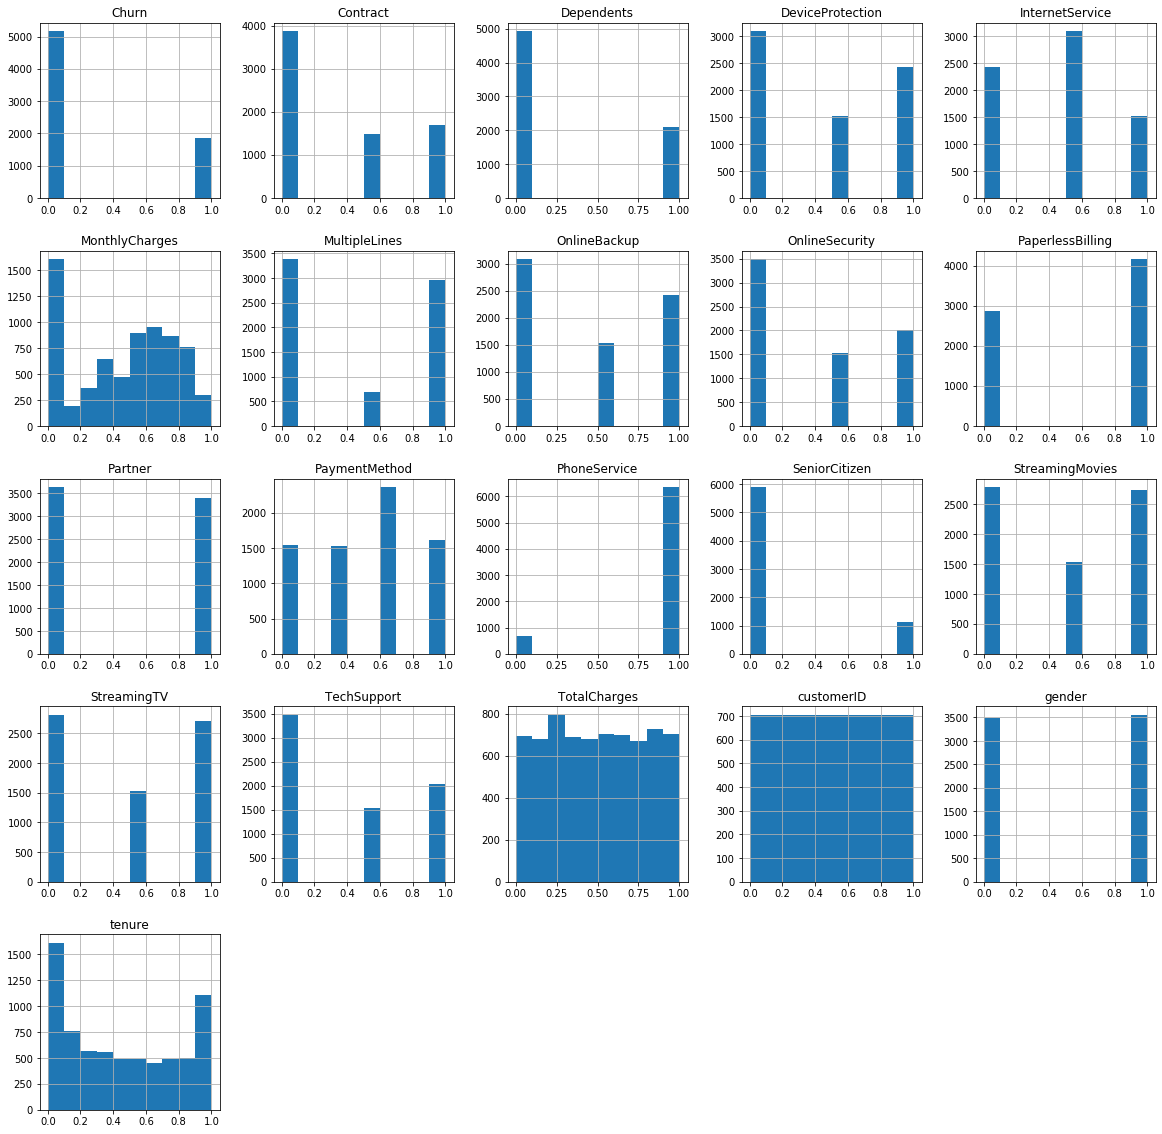

In [21]:
data.hist(figsize = (20,20))
plt.show()

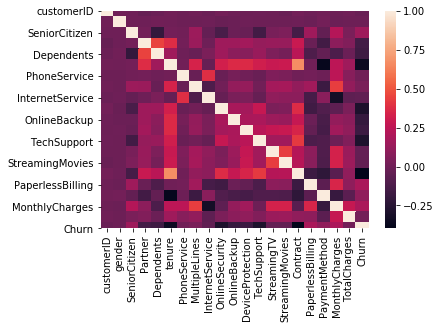

In [22]:
sns.heatmap(corr)


In [23]:
### Conclusion: What all did you understand from the above charts

### Implement Machine Learning Models

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)   # here we splitting our data to train,test

In [26]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [27]:
L = LogisticRegression()
SGD = SGDClassifier()
GNB = GaussianNB()
KN = KNeighborsClassifier()
RF = RandomForestClassifier(n_estimators=10, max_depth=5)

In [28]:
L = L.fit(X_train,y_train)
SGD =SGD.fit(X_train,y_train)
GNB = GNB.fit(X_train,y_train)
KN = KN.fit(X_train,y_train)
RF = RF.fit(X_train,y_train)

/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [29]:
print("Logistic Regression", L.score(X_train,y_train), "\n", "SGD", SGD.score(X_train,y_train), "\n", "GNB", GNB.score(X_train, y_train),"\n",  "KN", KN.score(X_train,y_train), "\n", "RF", RF.score(X_train,y_train))


Logistic Regression 0.8054668086616968 
 SGD 0.7353567625133121 
 GNB 0.7566560170394037 
 KN 0.7807951721689741 
 RF 0.8067092651757188


In [30]:
print("Logistic Regression", L.score(X_test,y_test), "\n", "SGD", SGD.score(X_test,y_test), "\n", "GNB", GNB.score(X_test, y_test),"\n",  "KN", KN.score(X_test,y_test), "\n", "RF", RF.score(X_test,y_test))


Logistic Regression 0.794889992902768 
 SGD 0.7459190915542938 
 GNB 0.7579843860894251 
 KN 0.7004968062455642 
 RF 0.7955997161107168


In [31]:
pred_L = L.predict(X_test)
pred_L = pd.DataFrame(pred_L)
pred_L.head()

,0
0,0
1,1
2,0
3,0
4,1


In [32]:
pred_RF = L.predict(X_test)
pred_RF = pd.DataFrame(pred_RF)
pred_RF.head()

,0
0,0
1,1
2,0
3,0
4,1


### Model Evaluation

In [33]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [34]:
print("confusion_matrix of logistic :","\n", confusion_matrix(y_test, pred_L), "\n", "confusion_matrix of Random Forest :","\n", confusion_matrix(y_test, pred_RF) )

confusion_matrix of logistic : 
 [[932  94]
 [195 188]] 
 confusion_matrix of Random Forest : 
 [[932  94]
 [195 188]]


In [35]:
print("logistic accuracy :", accuracy_score(y_test, pred_L),"\n","Random forest accuracy :",accuracy_score(y_test, pred_RF))

logistic accuracy : 0.794889992902768 
 Random forest accuracy : 0.794889992902768


In [36]:
print(classification_report(y_test,pred_L))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1026
           1       0.67      0.49      0.57       383

   micro avg       0.79      0.79      0.79      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.78      0.79      0.78      1409



### Final Conclusions

In [39]:
y_test

1093    0
646     1
710     1
3638    1
5481    1
       ..
4785    1
353     1
914     0
4708    0
1250    0
Name: Churn, Length: 1409, dtype: int64

In [40]:
pred_L

,0
0,0
1,1
2,0
3,0
4,1
...,...
1404,0
1405,1
1406,0
1407,0
